# BFS Search Algorithm

### Import the Graph Library and Other Utilities

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(parent_dir)

from assignment_1.lib.graph import Graph
from assignment_1.lib.load_romanian_cities import load_romania
from assignment_1.lib.matplotlib_utils import stack_plot, graph_visualizer
from assignment_1.lib.experiment_utils import experiment, city_benchmark

<h3>Algorithm Implementation</h3>

In [2]:
from collections import deque


def bfs(graph: Graph, start: str, goal: str) -> list[str]:
        fringe = deque()
        visited = set()
        parent = {}
        
        fringe.append(start)
        parent[start] = None

        while fringe:
            currentNode = fringe.popleft()

            if currentNode in visited:
                continue

            visited.add(currentNode)

            if currentNode == goal:
                # Construct the path from the start node to the target node
                path = []
                while currentNode is not None:
                    path.append(currentNode)
                    currentNode = parent[currentNode]
                path.reverse()
                return path
            
            for child, weight in graph.get_neighbours(currentNode):
                if child not in visited:
                    parent[child] = currentNode
                    fringe.append(child)

        return []

#### A, B, C. The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

In [3]:
average_time, average_path_length = city_benchmark(bfs)

#### D. Create random graphs with a number of nodes n = 10, 20, 30, 40. Randomly connect nodes with the probability of edges p = 0.2, 0.4, 0.6, 0.8. In total, you will have 16 graphs.

In [4]:
experiment_graphs, results = experiment(bfs, [10, 20, 30, 40], [0.2, 0.4, 0.6, 0.8])

##### (Optional) Code for graph visualizer, to visualize the generated graphs with their edges

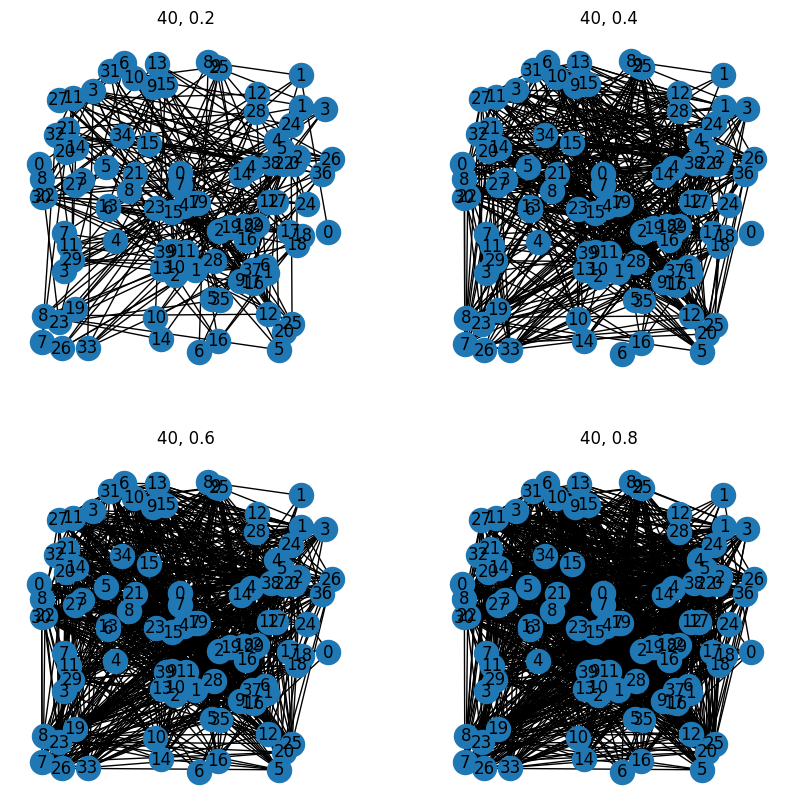

In [5]:
graph_visualizer(experiment_graphs)

## Plot the graphs using matplotlib.pyplot

#### A. Plot the time taken

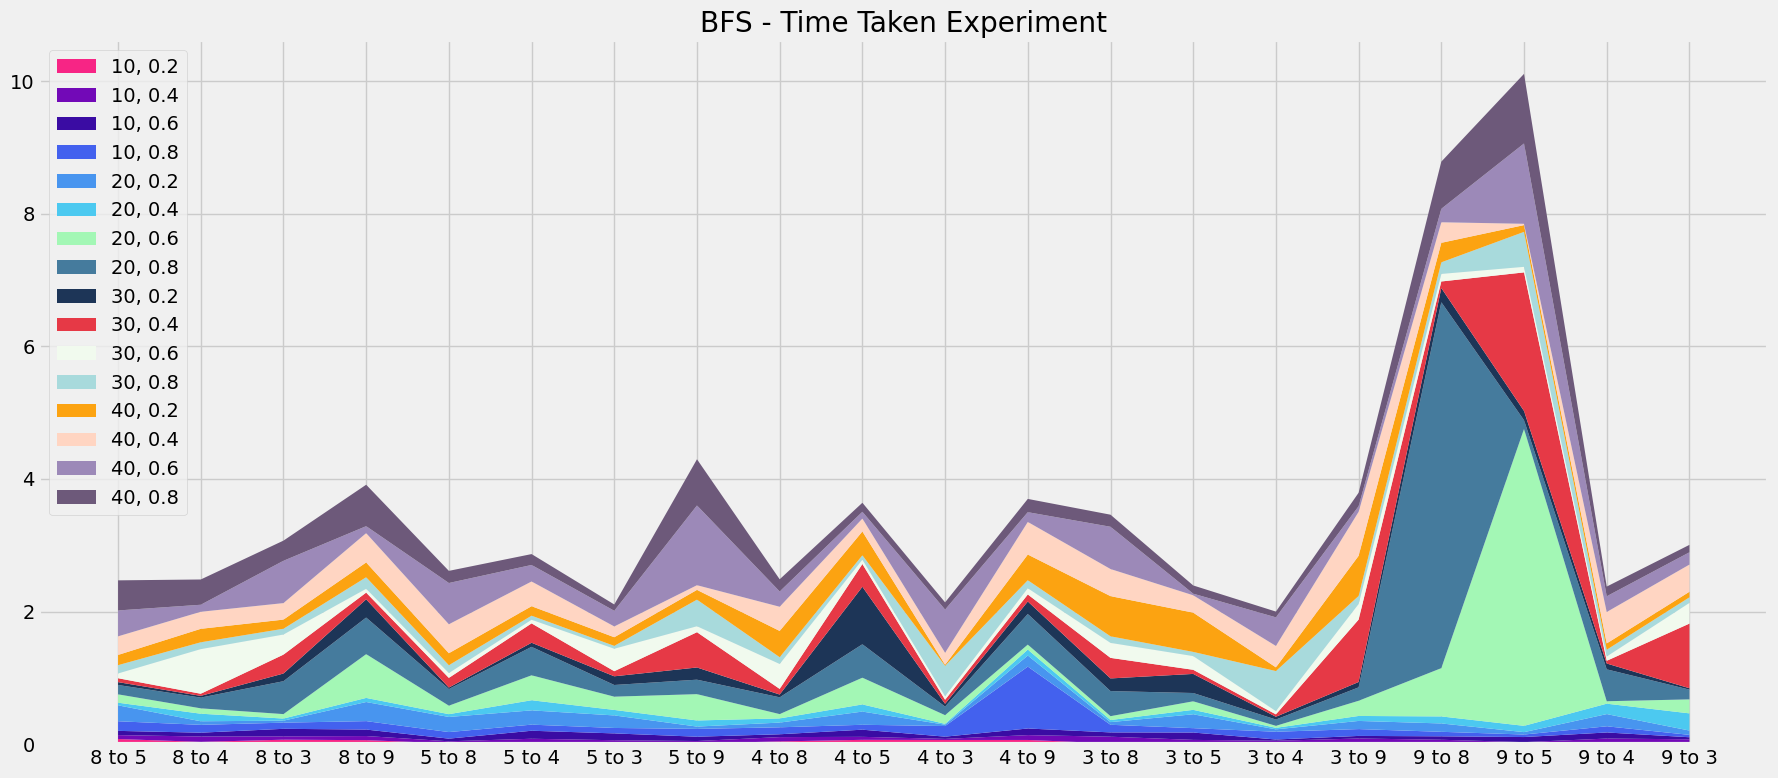

In [6]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plt.style.use('fivethirtyeight')

nodes = list(results['10, 0.2'].keys())
labels = []
time_taken = []

for i, (label, result) in enumerate(results.items()):
    labels.append(label)
    time_taken.append(list(round(time, 3) for time, path in result.values()))

stack_plot("BFS - Time Taken Experiment", nodes, time_taken, labels)

#### B. Plot the solution path length

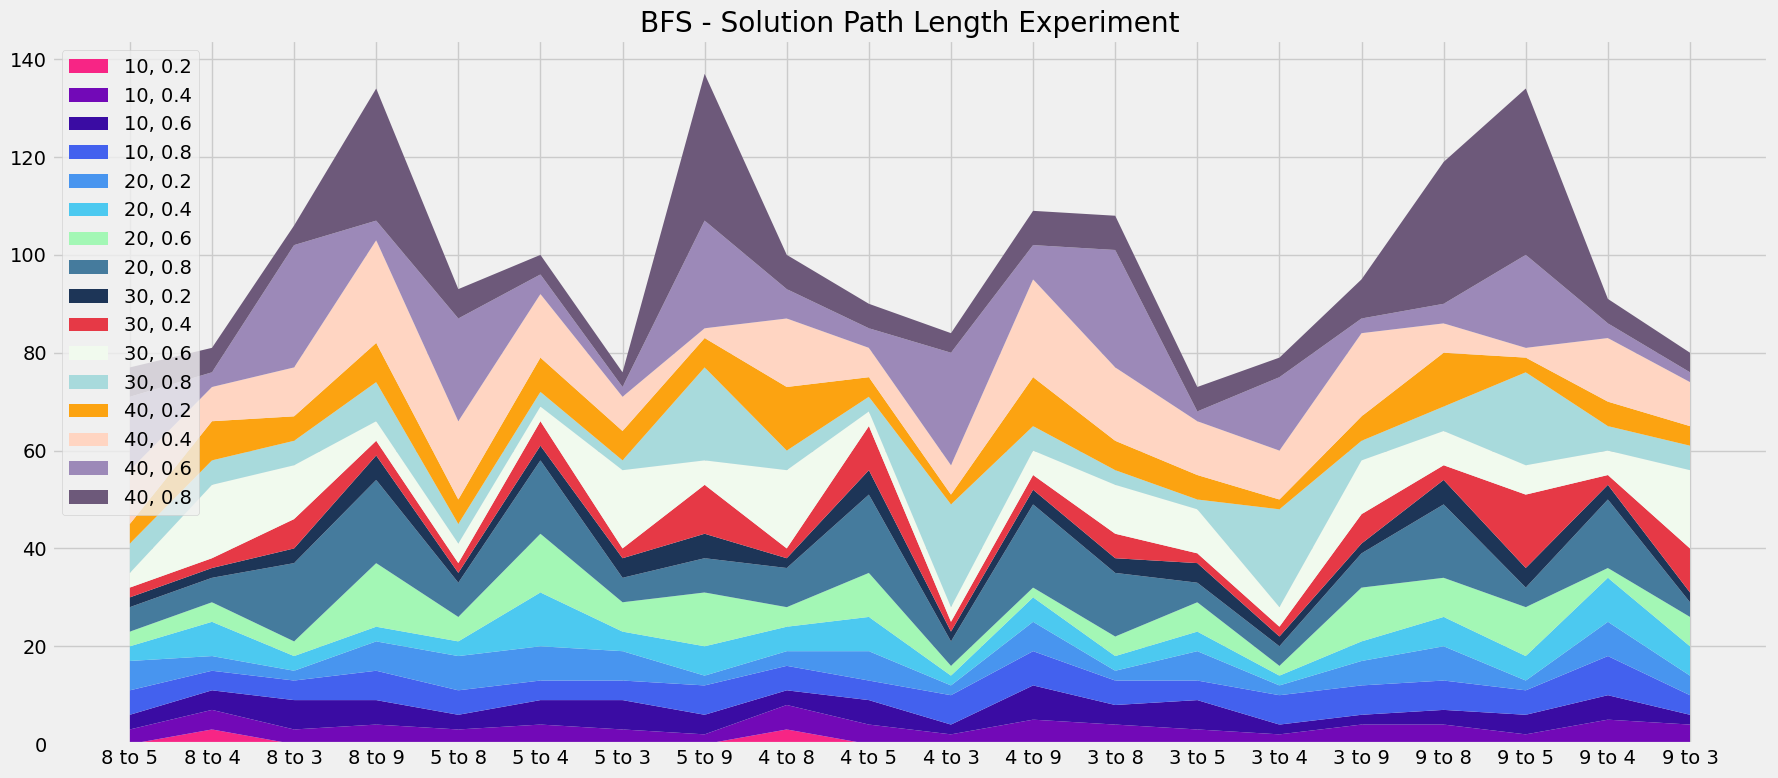

In [7]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plt.style.use('fivethirtyeight')

nodes = list(results['10, 0.2'].keys())
labels = []
path_length = []

for i, (label, result) in enumerate(results.items()):
    labels.append(label)
    path_length.append(list(len(path) if path else 0 for time, path in result.values()))

stack_plot("BFS - Solution Path Length Experiment", nodes, path_length, labels)